# Retrieval and Document Loaders in LangChain
* Notebook by Adam Lang
* Date: 6/28/2024

# Overview
* In this notebook we will go over retrieval and document loaders in LangChain.

## Retrieval Workflows in RAG
* Below is the typical Retrieval Workflow in a RAG pipeline.
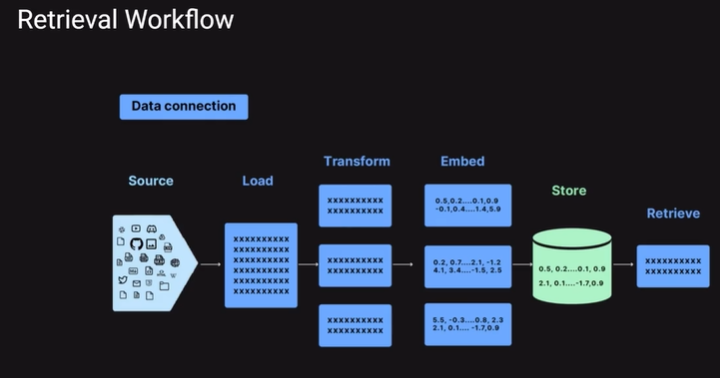

* Data connection --> internet or database, etc..
* Load data
* Transform into chunks
* Convert to embeddings
* Store chunks and embeddings in Vector Database (usually)
* Use LLM to retrieve semantic chunks.

## Step 1: Document Loaders - What are they?
* These are used to import data from various sources via LangChain as **Document** objects.
* A **Document** is:
   * 1. Text
   * 2. Metadata (from text chunks)
* LangChain integrates with over 100 document loader tools and libraries!
* Document loader workflow:

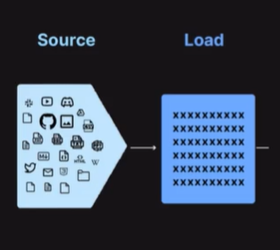

## Step 2: Document Splitters and Chunkers
* After load documents --> transform them to use with LLMs.
* Most common step is:
  * Split longer documents into smaller chunks that will fit in the LLM **context window**.
* LangChain provides out of the box numerous built-in document transformers to make the splitting and chunking process easier.
* Example of docuemnt splitters and chunkers flow:

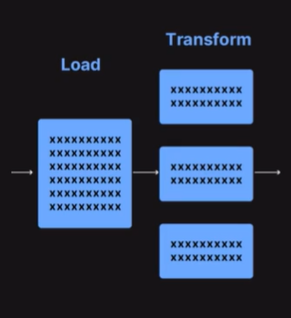

## Step 3: Embeddings
* After loading documents and splitting/chunking them, you typically create embeddings or vector representations of your documents.
  * Embedding --> semantic meaning is embedded into vector representation.
* The base Embeddings class within LangChain provides 2 methods:
  * 1. one for embedding documents
  * 2. one for embedding a query
* LangChain has integrations with the most popular sources for Embedding models including but not limited to:
  * 1. OpenAI
  * 2. HuggingFace

* Example of embeddings flow:

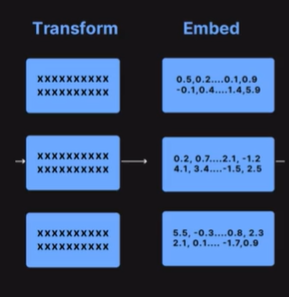

## Step 4: Vector Databases
* Used for document storage, embeddings and perform semantic vector search.
* Supports common operations such as:
  * Create
  * Update
  * Delete
  * Querying
* LangChain has various integrations with all of the most popular vector DBs including but not limited to:
  * Chroma
  * Pinecone
  * Weaviate
  * Milvus
  * ...etc...
* Example of Vector DBs flow:

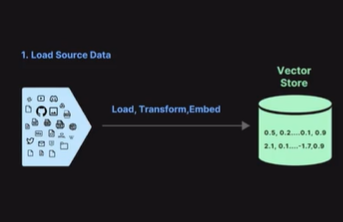

## Step 5: Retrievers
* Query string sent to user interface as input --> returns list of Documents as output.
* Retrievers can be created from vector DBs or other search APIs.
* LangChain allows us to use retrievers with a variety of retrieval strategies such as:
  * cosine similarity
  * maximal marginal relevance
  * multi-query retrieval and more....

* Example of retrieval flow:

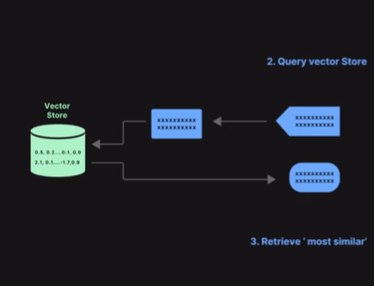

* **Retrieval strategy:** search and find the most semantically similar terms by vector embedding distance or similarity metrics and by index.

# Document Loaders
* LangChain provides resources and tools to allow loading or ingestion of documents from just about **any source as a data type object.**
* Document definition: `A document has a piece of text content and associated metadata`
* LangChain document loaders provide a `load` method for loading data as documents from a configured source.


## Document Loaders from **Unstructured.io**
* The `unstructured` library provides open-source components for ingesting and pre-processing documents such as but not limited to:
  * PDFs
  * HTML
  * Microsoft Word
  * ...etc...
* LangChain has bindings to the **Unstructured library** to access and use various data loaders.

## Popular Document loaders in LangChain
* CSV
* Markdown
* Text
* JSON
* PDF

# Implementing Document Loaders in LangChain

## Install OpenAI, HuggingFace, LangChain

In [1]:
!pip install langchain==0.2.0
!pip install langchain-openai==0.1.7
!pip install langchain-community==0.2.0

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [1]:
## unstructured.io --> takes 2 to 5 mins to install on colab
!pip install "unstructured[all-docs]==0.14.0"

* Note: may have to restart session to allow dependencies to load.

## Install OCR dependencies for unstructured
* Needed for OCR extraction from PDFs

In [2]:
## OCR dependencies for unstructured
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,843 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
## other libraries
!pip install jq==1.7.0
!pip install pypdf==4.2.0
!pip install pymupdf==1.24.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.6/657.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 63.6 MB/s eta 0:00:00


## Document Loaders
* Used to import data from various sources into LangChain `Document` objects.
* A `Document` includes a piece of text along with the metadata.

### Example Document Loaders:
* **Text File Loader**: Loads data from simple `.txt` file
* **Web Page Loader**: Retrieves the text content from any web page.
* **YouTube Video Transcript Loader**: Loads transcripts from YouTube videos.

### Functionality:
* **Load Method**: each document loader has a `load` method that enables the loading of data as documents from a pre-configured source.
* **Lazy Load Option**: Some loaders also support a "lazy load" feature which allows data to be loaded into memory gradually as needed.

* LangChain Document Loaders page: https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/

### Text Loader
* This is the simplest loader in a file as text and places it all into 1 document.

In [4]:
# load text from github --> README from langchain github
!curl -o README.md https://raw.githubusercontent.com/langchain-ai/langchain/master/README.md

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10226  100 10226    0     0  42636      0 --:--:-- --:--:-- --:--:-- 42786


In [5]:
from langchain_community.document_loaders import TextLoader

# instantiate loader
loader = TextLoader("./README.md")
doc = loader.load()

In [6]:
# length of doc
len(doc)

1

In [7]:
## what is type of doc?
type(doc[0])

langchain_core.documents.base.Document

In [8]:
## look at page content --> index only 1 document --> first 10,000 characters
print(doc[0].page_content[:10000])

# 🦜️🔗 LangChain

⚡ Build context-aware reasoning applications ⚡

[![Release Notes](https://img.shields.io/github/release/langchain-ai/langchain?style=flat-square)](https://github.com/langchain-ai/langchain/releases)
[![CI](https://github.com/langchain-ai/langchain/actions/workflows/check_diffs.yml/badge.svg)](https://github.com/langchain-ai/langchain/actions/workflows/check_diffs.yml)
[![PyPI - License](https://img.shields.io/pypi/l/langchain-core?style=flat-square)](https://opensource.org/licenses/MIT)
[![PyPI - Downloads](https://img.shields.io/pypi/dm/langchain-core?style=flat-square)](https://pypistats.org/packages/langchain-core)
[![GitHub star chart](https://img.shields.io/github/stars/langchain-ai/langchain?style=flat-square)](https://star-history.com/#langchain-ai/langchain)
[![Dependency Status](https://img.shields.io/librariesio/github/langchain-ai/langchain?style=flat-square)](https://libraries.io/github/langchain-ai/langchain)
[![Open Issues](https://img.shields.io/github/i

### Markdown Loader
* Markdown is a lightweight markup language for creating formatted text using a plain-text editor.
* This will demonstrate how to load Markdown documents into a langchain document format that we can use in our pipelines and chains.


#### Load entire document

In [9]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader

# instantiate the loader
loader = UnstructuredMarkdownLoader("./README.md", mode='single')
docs = loader.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [10]:
## check length of docs
len(docs)

1

In [11]:
## check doc types
type(docs[0])

langchain_core.documents.base.Document

In [12]:
## again print the page_content first 10,000 characters
print(docs[0].page_content[:10000])

🦜️🔗 LangChain

⚡ Build context-aware reasoning applications ⚡

Looking for the JS/TS library? Check out LangChain.js.

To help you ship LangChain apps to production faster, check out LangSmith. 
LangSmith is a unified developer platform for building, testing, and monitoring LLM applications. 
Fill out this form to speak with our sales team.

Quick Install

With pip:
bash
pip install langchain

With conda:
bash
conda install langchain -c conda-forge

🤔 What is LangChain?

LangChain is a framework for developing applications powered by large language models (LLMs).

For these applications, LangChain simplifies the entire application lifecycle:

Open-source libraries:  Build your applications using LangChain's open-source building blocks, components, and third-party integrations.
Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.

Productionization: Inspect, monitor, and evaluate your apps with LangSmith so that you can constantly optimize and

#### Load document and separate based on elements

In [13]:
## load UnstructuredMarkdownLoader
from langchain_community.document_loaders import UnstructuredMarkdownLoader

# instantiate loader
loader = UnstructuredMarkdownLoader("./README.md", mode="elements")
docs = loader.load()

In [14]:
# check length of docs
len(docs)

66

In [15]:
## look at first 10 documents
print(docs[:10])

[Document(page_content='🦜️🔗 LangChain', metadata={'source': './README.md', 'last_modified': '2024-07-02T17:59:45', 'languages': ['eng'], 'filetype': 'text/markdown', 'file_directory': '.', 'filename': 'README.md', 'category': 'Title'}), Document(page_content='⚡ Build context-aware reasoning applications ⚡', metadata={'source': './README.md', 'last_modified': '2024-07-02T17:59:45', 'languages': ['eng'], 'parent_id': '200b8a7d0dd03f66e4f13456566d2b3a', 'filetype': 'text/markdown', 'file_directory': '.', 'filename': 'README.md', 'category': 'NarrativeText'}), Document(page_content='Looking for the JS/TS library? Check out LangChain.js.', metadata={'source': './README.md', 'last_modified': '2024-07-02T17:59:45', 'languages': ['eng'], 'parent_id': '200b8a7d0dd03f66e4f13456566d2b3a', 'filetype': 'text/markdown', 'file_directory': '.', 'filename': 'README.md', 'category': 'NarrativeText'}), Document(page_content='To help you ship LangChain apps to production faster, check out LangSmith. \nLan

In [16]:
## View metadata from document
from collections import Counter

Counter([doc.metadata['category'] for doc in docs])

Counter({'Title': 19, 'NarrativeText': 19, 'ListItem': 28})

#### Comparing **Unstructured.io loaders** direct use instead of **LangChain wrapper API**

In [17]:
## using unstructured.io loaders directly
from unstructured.partition.md import partition_md

# load docs --> pass file
docs = partition_md(filename="./README.md")

In [18]:
# length of docs
len(docs)

66

In [19]:
## view first 10 docs
print(docs[:10])

[<unstructured.documents.elements.Title object at 0x7d26ffa75ba0>, <unstructured.documents.elements.NarrativeText object at 0x7d26ffa75c00>, <unstructured.documents.elements.NarrativeText object at 0x7d26ffa75c90>, <unstructured.documents.elements.NarrativeText object at 0x7d26ffa75d20>, <unstructured.documents.elements.Title object at 0x7d26ffa75db0>, <unstructured.documents.elements.Title object at 0x7d26ffa75e40>, <unstructured.documents.elements.NarrativeText object at 0x7d26ffa75ed0>, <unstructured.documents.elements.Title object at 0x7d26ffa75f90>, <unstructured.documents.elements.NarrativeText object at 0x7d26ffa76020>, <unstructured.documents.elements.NarrativeText object at 0x7d26ffa76110>]


In [20]:
## explore documents converting to dictionary
docs[0].to_dict()

{'type': 'Title',
 'element_id': '200b8a7d0dd03f66e4f13456566d2b3a',
 'text': '🦜️🔗 LangChain',
 'metadata': {'last_modified': '2024-07-02T17:59:45',
  'languages': ['eng'],
  'filetype': 'text/markdown',
  'file_directory': '.',
  'filename': 'README.md'}}

In [21]:
# explore another document
docs[1].to_dict()

{'type': 'NarrativeText',
 'element_id': '80d06543c0c2b75ca147f3509e518a47',
 'text': '⚡ Build context-aware reasoning applications ⚡',
 'metadata': {'last_modified': '2024-07-02T17:59:45',
  'languages': ['eng'],
  'parent_id': '200b8a7d0dd03f66e4f13456566d2b3a',
  'filetype': 'text/markdown',
  'file_directory': '.',
  'filename': 'README.md'}}

In [23]:
# another doc
docs[2].to_dict()

{'type': 'NarrativeText',
 'element_id': 'd68276ff4183b272b9dec78754e769b1',
 'text': 'Looking for the JS/TS library? Check out LangChain.js.',
 'metadata': {'last_modified': '2024-07-02T17:59:45',
  'languages': ['eng'],
  'parent_id': '200b8a7d0dd03f66e4f13456566d2b3a',
  'filetype': 'text/markdown',
  'file_directory': '.',
  'filename': 'README.md'}}

### Convert to LangChain document types

In [24]:
## langchain document imports
from langchain_core.documents import Document

# instantiate langchain docs and convert to LangChain document type
lc_docs = [Document(page_content=doc.text,
                    metadata=doc.metadata.to_dict())
                    for doc in docs]

# print first 10
lc_docs[:10]

[Document(page_content='🦜️🔗 LangChain', metadata={'last_modified': '2024-07-02T17:59:45', 'languages': ['eng'], 'filetype': 'text/markdown', 'file_directory': '.', 'filename': 'README.md'}),
 Document(page_content='⚡ Build context-aware reasoning applications ⚡', metadata={'last_modified': '2024-07-02T17:59:45', 'languages': ['eng'], 'parent_id': '200b8a7d0dd03f66e4f13456566d2b3a', 'filetype': 'text/markdown', 'file_directory': '.', 'filename': 'README.md'}),
 Document(page_content='Looking for the JS/TS library? Check out LangChain.js.', metadata={'last_modified': '2024-07-02T17:59:45', 'languages': ['eng'], 'parent_id': '200b8a7d0dd03f66e4f13456566d2b3a', 'filetype': 'text/markdown', 'file_directory': '.', 'filename': 'README.md'}),
 Document(page_content='To help you ship LangChain apps to production faster, check out LangSmith. \nLangSmith is a unified developer platform for building, testing, and monitoring LLM applications. \nFill out this form to speak with our sales team.', met

### CSV Loader
* Comma separated value (CSV) file. Each line of text is a data record. Each record consists of 1 or more fields separated by commas.
* LangChain implements a CSV loader that loads CSV files into a sequence of `Document` objects. Each row of the CSV file is converted to 1 document.

In [25]:
import pandas as pd

# Create a DataFrame with some dummy real estate data
data = {
    'Property_ID': [101, 102, 103, 104, 105],
    'Address': ['123 Elm St', '456 Oak St', '789 Pine St', '321 Maple St', '654 Cedar St'],
    'City': ['Springfield', 'Rivertown', 'Laketown', 'Hillside', 'Sunnyvale'],
    'State': ['CA', 'TX', 'FL', 'NY', 'CO'],
    'Zip_Code': [98765, 87654, 76543, 65432, 54321],
    'Bedrooms': [3, 2, 4, 3, 5],
    'Bathrooms': [2, 1, 3, 2, 4],
    'Listing_Price': [500000, 350000, 600000, 475000, 750000]
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('data.csv', index=False)




In [26]:
## langchain CSV loader
from langchain_community.document_loaders.csv_loader import CSVLoader

# load document into loader
loader = CSVLoader(file_path="./data.csv")
docs = loader.load()

In [27]:
# print docs
docs

[Document(page_content='Property_ID: 101\nAddress: 123 Elm St\nCity: Springfield\nState: CA\nZip_Code: 98765\nBedrooms: 3\nBathrooms: 2\nListing_Price: 500000', metadata={'source': './data.csv', 'row': 0}),
 Document(page_content='Property_ID: 102\nAddress: 456 Oak St\nCity: Rivertown\nState: TX\nZip_Code: 87654\nBedrooms: 2\nBathrooms: 1\nListing_Price: 350000', metadata={'source': './data.csv', 'row': 1}),
 Document(page_content='Property_ID: 103\nAddress: 789 Pine St\nCity: Laketown\nState: FL\nZip_Code: 76543\nBedrooms: 4\nBathrooms: 3\nListing_Price: 600000', metadata={'source': './data.csv', 'row': 2}),
 Document(page_content='Property_ID: 104\nAddress: 321 Maple St\nCity: Hillside\nState: NY\nZip_Code: 65432\nBedrooms: 3\nBathrooms: 2\nListing_Price: 475000', metadata={'source': './data.csv', 'row': 3}),
 Document(page_content='Property_ID: 105\nAddress: 654 Cedar St\nCity: Sunnyvale\nState: CO\nZip_Code: 54321\nBedrooms: 5\nBathrooms: 4\nListing_Price: 750000', metadata={'sourc

In [28]:
# print an index of documents
print(docs[0])

page_content='Property_ID: 101\nAddress: 123 Elm St\nCity: Springfield\nState: CA\nZip_Code: 98765\nBedrooms: 3\nBathrooms: 2\nListing_Price: 500000' metadata={'source': './data.csv', 'row': 0}


In [29]:
## print page_content
print(docs[0].page_content)

Property_ID: 101
Address: 123 Elm St
City: Springfield
State: CA
Zip_Code: 98765
Bedrooms: 3
Bathrooms: 2
Listing_Price: 500000


Note:
* `CSVLoader` will accept a `csv_args` kwarg that supports customization of arguments passed to Python's csv.`DictReader`.
* Additional information could be found in the csv module docs: https://docs.python.org/3/library/csv.html

In [34]:
data_path = '/content/data.csv'

In [41]:
## load in document with some user friendly fieldnames
loader = CSVLoader(file_path=data_path,
                   csv_args={
                       "delimiter": ",",
                       "quotechar": '"',
                       "fieldnames": ["Property_ID", "Address", "City","State",
                                      "Zip_Code", "Bedrooms", "Bathrooms", "Listing_Price"],
                   },
                   )

# load documents
docs = loader.load()

In [42]:
# print docs
print(docs)

[Document(page_content='Property_ID: Property_ID\nAddress: Address\nCity: City\nState: State\nZip_Code: Zip_Code\nBedrooms: Bedrooms\nBathrooms: Bathrooms\nListing_Price: Listing_Price', metadata={'source': '/content/data.csv', 'row': 0}), Document(page_content='Property_ID: 101\nAddress: 123 Elm St\nCity: Springfield\nState: CA\nZip_Code: 98765\nBedrooms: 3\nBathrooms: 2\nListing_Price: 500000', metadata={'source': '/content/data.csv', 'row': 1}), Document(page_content='Property_ID: 102\nAddress: 456 Oak St\nCity: Rivertown\nState: TX\nZip_Code: 87654\nBedrooms: 2\nBathrooms: 1\nListing_Price: 350000', metadata={'source': '/content/data.csv', 'row': 2}), Document(page_content='Property_ID: 103\nAddress: 789 Pine St\nCity: Laketown\nState: FL\nZip_Code: 76543\nBedrooms: 4\nBathrooms: 3\nListing_Price: 600000', metadata={'source': '/content/data.csv', 'row': 3}), Document(page_content='Property_ID: 104\nAddress: 321 Maple St\nCity: Hillside\nState: NY\nZip_Code: 65432\nBedrooms: 3\nBath

#### Unstructured.io will load the entire CSV file as a single table

In [43]:
from langchain_community.document_loaders import UnstructuredCSVLoader

# loader
loader = UnstructuredCSVLoader("./data.csv")
docs = loader.load()

In [44]:
# length of docs
len(docs)

1

In [45]:
# print a document
docs[0]

Document(page_content='\n\n\nProperty_ID\nAddress\nCity\nState\nZip_Code\nBedrooms\nBathrooms\nListing_Price\n\n\n101\n123 Elm St\nSpringfield\nCA\n98765\n3\n2\n500000\n\n\n102\n456 Oak St\nRivertown\nTX\n87654\n2\n1\n350000\n\n\n103\n789 Pine St\nLaketown\nFL\n76543\n4\n3\n600000\n\n\n104\n321 Maple St\nHillside\nNY\n65432\n3\n2\n475000\n\n\n105\n654 Cedar St\nSunnyvale\nCO\n54321\n5\n4\n750000\n\n\n', metadata={'source': './data.csv'})

### JSON Loader
* JSON Lines is a file format where each line is a valid JSON value.
  * documentation: https://jsonlines.org/
* LangChain implements a JSONLoader to convert JSON and JSONL data into LangChain `Document` objects.
  * It uses a specified **jqschema** to parse the JSON files allowing the extraction of specific fields into content and metadata of the LangChain Document.
  * LangChain jq schema: https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/json/#json-file-with-jq-schema-content_key
  * The **jq** python package is used. More on the syntax:https://github.com/jqlang
     * Allows specific field extraction from JSON documents.

In [46]:
import json

# Sample data dictionary similar to the one you provided but with modified contents
data = {
    'image': {'creation_timestamp': 1675549016, 'uri': 'image_of_the_meeting.jpg'},
    'is_still_participant': True,
    'joinable_mode': {'link': '', 'mode': 1},
    'magic_words': [],
    'messages': [
        {'content': 'See you soon!',
         'sender_name': 'User B',
         'timestamp_ms': 1675597571851},
        {'content': 'Thanks for the update! See you then.',
         'sender_name': 'User A',
         'timestamp_ms': 1675597435669},
        {'content': 'Actually, the green one is sold out.',
         'sender_name': 'User B',
         'timestamp_ms': 1675596277579},
        {'content': 'I was hoping to purchase the green one!',
         'sender_name': 'User A',
         'timestamp_ms': 1675595140251},
        {'content': 'I’m really interested in the green one, not the red!',
         'sender_name': 'User A',
         'timestamp_ms': 1675595109305},
        {'content': 'Here’s the $150 for it.',
         'sender_name': 'User B',
         'timestamp_ms': 1675595068468},
        {'photos': [{'creation_timestamp': 1675595059,
                     'uri': 'image_of_the_item.jpg'}],
         'sender_name': 'User B',
         'timestamp_ms': 1675595060730},
        {'content': 'It typically sells for at least $200 online',
         'sender_name': 'User B',
         'timestamp_ms': 1675595045152},
        {'content': 'How much are you asking?',
         'sender_name': 'User A',
         'timestamp_ms': 1675594799696},
        {'content': 'Good morning! $50 is far too low.',
         'sender_name': 'User B',
         'timestamp_ms': 1675577876645},
        {'content': 'Hello! I’m interested in the item you posted. I can offer $50. Let me know if that works for you. Thanks!',
         'sender_name': 'User A',
         'timestamp_ms': 1675549022673}
    ],
    'participants': [{'name': 'User A'}, {'name': 'User B'}],
    'thread_path': 'inbox/User A and User B chat',
    'title': 'User A and User B chat'
}

# Save the modified data to a JSON file
with open('chat_data.json', 'w') as file:
    json.dump(data, file, indent=4)


#### To load the full data as a single document

In [47]:
from langchain_community.document_loaders import JSONLoader

# loader
loader = JSONLoader(
    file_path='./chat_data.json',
    jq_schema='.',
    text_content=False)

# load data
data = loader.load()

In [48]:
# length of data
len(data)

1

In [49]:
# print data
data

[Document(page_content='{"image": {"creation_timestamp": 1675549016, "uri": "image_of_the_meeting.jpg"}, "is_still_participant": true, "joinable_mode": {"link": "", "mode": 1}, "magic_words": [], "messages": [{"content": "See you soon!", "sender_name": "User B", "timestamp_ms": 1675597571851}, {"content": "Thanks for the update! See you then.", "sender_name": "User A", "timestamp_ms": 1675597435669}, {"content": "Actually, the green one is sold out.", "sender_name": "User B", "timestamp_ms": 1675596277579}, {"content": "I was hoping to purchase the green one!", "sender_name": "User A", "timestamp_ms": 1675595140251}, {"content": "I\\u2019m really interested in the green one, not the red!", "sender_name": "User A", "timestamp_ms": 1675595109305}, {"content": "Here\\u2019s the $150 for it.", "sender_name": "User B", "timestamp_ms": 1675595068468}, {"photos": [{"creation_timestamp": 1675595059, "uri": "image_of_the_item.jpg"}], "sender_name": "User B", "timestamp_ms": 1675595060730}, {"co

#### What if we are only interested in extracting the values under the `messages` key of the JSON data.
* We can use the **jq_schema** to extract a specific field from the JSON.

In [50]:
loader = JSONLoader(
    file_path='./chat_data.json',
    jq_schema='.messages[]',
    text_content=False)


# load data
data = loader.load()
data

[Document(page_content='{"content": "See you soon!", "sender_name": "User B", "timestamp_ms": 1675597571851}', metadata={'source': '/content/chat_data.json', 'seq_num': 1}),
 Document(page_content='{"content": "Thanks for the update! See you then.", "sender_name": "User A", "timestamp_ms": 1675597435669}', metadata={'source': '/content/chat_data.json', 'seq_num': 2}),
 Document(page_content='{"content": "Actually, the green one is sold out.", "sender_name": "User B", "timestamp_ms": 1675596277579}', metadata={'source': '/content/chat_data.json', 'seq_num': 3}),
 Document(page_content='{"content": "I was hoping to purchase the green one!", "sender_name": "User A", "timestamp_ms": 1675595140251}', metadata={'source': '/content/chat_data.json', 'seq_num': 4}),
 Document(page_content='{"content": "I\\u2019m really interested in the green one, not the red!", "sender_name": "User A", "timestamp_ms": 1675595109305}', metadata={'source': '/content/chat_data.json', 'seq_num': 5}),
 Document(pag

### PDF Loaders
* PDF or "Portable Document Format" is standardized ISO 32000, a file format developed by Adobe in 1992 to present documents including text, formatting and images independent of software, hardware and operating systems.
* LangChain is able to integrate with multiple PDF parsers.
  * Some of the parsers are "simple and low-level".
  * Other parsers support OCR and image processing
  * Some parsers can perform advanced document layout analysis.
  * ....parser selection depends on your use case!

* Below we will load PDF documents into LangChain `document` format.
* We will use a research paper as an example experiment.

In [51]:
## get the paper
!wget -O 'layoutparser_paper.pdf' 'http://arxiv.org/pdf/2103.15348.pdf'

--2024-07-02 18:09:37--  http://arxiv.org/pdf/2103.15348.pdf
Resolving arxiv.org (arxiv.org)... 151.101.131.42, 151.101.3.42, 151.101.67.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.131.42|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/2103.15348 [following]
--2024-07-02 18:09:37--  http://arxiv.org/pdf/2103.15348
Reusing existing connection to arxiv.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 4686220 (4.5M) [application/pdf]
Saving to: ‘layoutparser_paper.pdf’

layoutparser_paper. 100%[===================>]   4.47M  --.-KB/s    in 0.05s   

2024-07-02 18:09:37 (85.4 MB/s) - ‘layoutparser_paper.pdf’ saved [4686220/4686220]



### PyPDFLoader
* Below we will now load the PDF we downloaded using the `pypdf` function from LangChain into a list of documents.
* Each document contains the page content and metadata with page number.
* Usually each PDF page will be 1 document.

In [52]:
from langchain_community.document_loaders import PyPDFLoader

# loader
loader = PyPDFLoader("./layoutparser_paper.pdf")

# load the pages
pages = loader.load()

In [53]:
# length of pages
len(pages)

16

In [54]:
# print 1 page
print(pages[0])

page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\neﬀorts to improve reusability and simplify deep learning (DL) model\ndevelopment in disciplin

In [55]:
# print 1 page and the page_content
print(pages[0].page_content)

LayoutParser : A Uniﬁed Toolkit for Deep
Learning Based Document Image Analysis
Zejiang Shen1(  ), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain
Lee4, Jacob Carlson3, and Weining Li5
1Allen Institute for AI
shannons@allenai.org
2Brown University
ruochen zhang@brown.edu
3Harvard University
{melissadell,jacob carlson }@fas.harvard.edu
4University of Washington
bcgl@cs.washington.edu
5University of Waterloo
w422li@uwaterloo.ca
Abstract. Recent advances in document image analysis (DIA) have been
primarily driven by the application of neural networks. Ideally, research
outcomes could be easily deployed in production and extended for further
investigation. However, various factors like loosely organized codebases
and sophisticated model conﬁgurations complicate the easy reuse of im-
portant innovations by a wide audience. Though there have been on-going
eﬀorts to improve reusability and simplify deep learning (DL) model
development in disciplines like natural language processing an

In [56]:
# print another page and the page_content
print(pages[4].page_content)

LayoutParser : A Uniﬁed Toolkit for DL-Based DIA 5
Table 1: Current layout detection models in the LayoutParser model zoo
Dataset Base Model1Large Model Notes
PubLayNet [38] F / M M Layouts of modern scientiﬁc documents
PRImA [3] M - Layouts of scanned modern magazines and scientiﬁc reports
Newspaper [17] F - Layouts of scanned US newspapers from the 20th century
TableBank [18] F F Table region on modern scientiﬁc and business document
HJDataset [31] F / M - Layouts of history Japanese documents
1For each dataset, we train several models of diﬀerent sizes for diﬀerent needs (the trade-oﬀ between accuracy
vs. computational cost). For “base model” and “large model”, we refer to using the ResNet 50 or ResNet 101
backbones [ 13], respectively. One can train models of diﬀerent architectures, like Faster R-CNN [ 28] (F) and Mask
R-CNN [ 12] (M). For example, an F in the Large Model column indicates it has a Faster R-CNN model trained
using the ResNet 101 backbone. The platform is maintained 

### PyMuPDFLoader
* **This is the FASTEST OF THE PDF parsing options available in LangChain**.
* **Use this loader if you are loading a lot of PDF documents.**
* This contains metadata from the PDF and its pages.
* This also returns 1 document per page.
* The python library `pymupdf` is used internally.

In [57]:
from langchain_community.document_loaders import PyMuPDFLoader

# loader
loader = PyMuPDFLoader("./layoutparser_paper.pdf")
pages = loader.load()

In [58]:
# length of pages
len(pages)

16

In [59]:
# print a page
pages[0]

Document(page_content='LayoutParser: A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1 (\x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1 Allen Institute for AI\nshannons@allenai.org\n2 Brown University\nruochen zhang@brown.edu\n3 Harvard University\n{melissadell,jacob carlson}@fas.harvard.edu\n4 University of Washington\nbcgl@cs.washington.edu\n5 University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\neﬀorts to improve reusability and simplify deep learning (DL) model\ndevelopment 

In [60]:
# pages metadata
pages[0].metadata

{'source': './layoutparser_paper.pdf',
 'file_path': './layoutparser_paper.pdf',
 'page': 0,
 'total_pages': 16,
 'format': 'PDF 1.5',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': 'LaTeX with hyperref',
 'producer': 'pdfTeX-1.40.21',
 'creationDate': 'D:20210622012710Z',
 'modDate': 'D:20210622012710Z',
 'trapped': ''}

In [61]:
print(pages[0].page_content)

LayoutParser: A Uniﬁed Toolkit for Deep
Learning Based Document Image Analysis
Zejiang Shen1 ( ), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain
Lee4, Jacob Carlson3, and Weining Li5
1 Allen Institute for AI
shannons@allenai.org
2 Brown University
ruochen zhang@brown.edu
3 Harvard University
{melissadell,jacob carlson}@fas.harvard.edu
4 University of Washington
bcgl@cs.washington.edu
5 University of Waterloo
w422li@uwaterloo.ca
Abstract. Recent advances in document image analysis (DIA) have been
primarily driven by the application of neural networks. Ideally, research
outcomes could be easily deployed in production and extended for further
investigation. However, various factors like loosely organized codebases
and sophisticated model conﬁgurations complicate the easy reuse of im-
portant innovations by a wide audience. Though there have been on-going
eﬀorts to improve reusability and simplify deep learning (DL) model
development in disciplines like natural language processing

In [62]:
print(pages[4].page_content)

LayoutParser: A Uniﬁed Toolkit for DL-Based DIA
5
Table 1: Current layout detection models in the LayoutParser model zoo
Dataset
Base Model1 Large Model
Notes
PubLayNet [38]
F / M
M
Layouts of modern scientiﬁc documents
PRImA [3]
M
-
Layouts of scanned modern magazines and scientiﬁc reports
Newspaper [17]
F
-
Layouts of scanned US newspapers from the 20th century
TableBank [18]
F
F
Table region on modern scientiﬁc and business document
HJDataset [31]
F / M
-
Layouts of history Japanese documents
1 For each dataset, we train several models of diﬀerent sizes for diﬀerent needs (the trade-oﬀbetween accuracy
vs. computational cost). For “base model” and “large model”, we refer to using the ResNet 50 or ResNet 101
backbones [13], respectively. One can train models of diﬀerent architectures, like Faster R-CNN [28] (F) and Mask
R-CNN [12] (M). For example, an F in the Large Model column indicates it has a Faster R-CNN model trained
using the ResNet 101 backbone. The platform is maintained and

### UnstructuredPDFLoader
* Unstructured.io also supports a common interface for working with unstructured or semi-structured file formats such as Markdown or PDF.
* LangChain's `UnstructuredPDFLoader` integrates with Unstructured to parse PDF documents into LangChain Document objects.

In [63]:
## load PDF as a single document - no complex parsing
from langchain_community.document_loaders import UnstructuredPDFLoader

# loader
loader = UnstructuredPDFLoader('./layoutparser_paper.pdf')
data = loader.load()

In [64]:
# length of data
len(data)

1

In [65]:
# get page content --> first 10,000 characters
print(data[0].page_content[:10000])

1 2 0 2

n u J

1 2

]

V C . s c [

2 v 8 4 3 5 1 . 3 0 1 2 : v i X r a

LayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis

Zejiang Shen1 ((cid:0)), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain Lee4, Jacob Carlson3, and Weining Li5

1 Allen Institute for AI shannons@allenai.org 2 Brown University ruochen zhang@brown.edu 3 Harvard University {melissadell,jacob carlson}@fas.harvard.edu 4 University of Washington bcgl@cs.washington.edu 5 University of Waterloo w422li@uwaterloo.ca

Abstract. Recent advances in document image analysis (DIA) have been primarily driven by the application of neural networks. Ideally, research outcomes could be easily deployed in production and extended for further investigation. However, various factors like loosely organized codebases and sophisticated model conﬁgurations complicate the easy reuse of im- portant innovations by a wide audience. Though there have been on-going eﬀorts to improve reusability and simplify d

#### Load PDF with complex parsing, table detection and chunking by sections
* This will take a little longer to execute because it uses specific transformers under the hood which take time to download and run.

In [66]:
# this may take 3-5 mins on colab
# takes 3-4 mins on Colab
loader = UnstructuredPDFLoader('./layoutparser_paper.pdf',
                               strategy='hi_res',
                               extract_images_in_pdf=False, #not extracting images
                               infer_table_structure=True, # we are extracting tables
                               chunking_strategy="by_title", #chunking the paper by title sections
                               max_characters=4000, # max size of chunks
                               new_after_n_chars=3800, # preferred size of chunks
                               combine_text_under_n_chars=2000, # smaller chunks < 2000 chars will be combined into a larger chunk
                               mode='elements')
data = loader.load()

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [67]:
# length of data
len(data)

18

In [68]:
# metadata
[doc.metadata['category'] for doc in data]

['CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement']

In [69]:
# print first document
print(data[0])

page_content='1 2 0 2\n\nn u J 1 2 ] V C . s c [\n\n2 v 8 4 3 5 1 . 3 0 1 2 : v i X r a\n\nLayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis\n\nZejiang Shen! (4), Ruochen Zhang”, Melissa Dell?, Benjamin Charles Germain Lee*, Jacob Carlson’, and Weining Li®\n\n1 Allen Institute for AI shannons@allenai.org 2 Brown University ruochen zhang@brown.edu 3 Harvard University {melissadell,jacob carlson}@fas.harvard.edu 4 University of Washington bcgl@cs.washington.edu 5 University of Waterloo w422li@uwaterloo.ca\n\nAbstract. Recent advances in document image analysis (DIA) have been primarily driven by the application of neural networks. Ideally, research outcomes could be easily deployed in production and extended for further investigation. However, various factors like loosely organized codebases and sophisticated model conﬁgurations complicate the easy reuse of im- portant innovations by a wide audience. Though there have been on-going eﬀorts to improve reusabili

In [70]:
# print another document
print(data[5])

page_content='Dataset Base Model1 Large Model Notes PubLayNet [38] PRImA [3] Newspaper [17] TableBank [18] HJDataset [31] F / M M F F F / M M - - F - Layouts of modern scientiﬁc documents Layouts of scanned modern magazines and scientiﬁc reports Layouts of scanned US newspapers from the 20th century Table region on modern scientiﬁc and business document Layouts of history Japanese documents' metadata={'source': './layoutparser_paper.pdf', 'last_modified': '2023-01-23T09:15:33', 'text_as_html': "<table><thead><th>Dataset</th><th>| Base Model'|</th><th>| Notes</th></thead><tr><td>PubLayNet B8]|</td><td>F/M</td><td>Layouts of modern scientific documents</td></tr><tr><td>PRImA</td><td>M</td><td>Layouts of scanned modern magazines and scientific report</td></tr><tr><td>Newspaper</td><td>F</td><td>Layouts of scanned US newspapers from the 20th century</td></tr><tr><td>TableBank</td><td>F</td><td>Table region on modern scientific and business document</td></tr><tr><td>HJDataset</td><td>F/M</t

In [71]:
# print page_content
print(data[5].page_content)

Dataset Base Model1 Large Model Notes PubLayNet [38] PRImA [3] Newspaper [17] TableBank [18] HJDataset [31] F / M M F F F / M M - - F - Layouts of modern scientiﬁc documents Layouts of scanned modern magazines and scientiﬁc reports Layouts of scanned US newspapers from the 20th century Table region on modern scientiﬁc and business document Layouts of history Japanese documents


In [72]:
## format for ipython notebook
from IPython.display import HTML

HTML(data[5].metadata['text_as_html'])

PubLayNet B8]|,F/M,Layouts of modern scientific documents
PRImA,M,Layouts of scanned modern magazines and scientific report
Newspaper,F,Layouts of scanned US newspapers from the 20th century
TableBank,F,Table region on modern scientific and business document
HJDataset,F/M,Layouts of history Japanese documents


#### Load using raw unstructured.io APIs for PDFs

In [73]:
from unstructured.partition.pdf import partition_pdf

# Get elements - takes 3-4 mins
raw_pdf_elements = partition_pdf(
    filename="./layoutparser_paper.pdf",
    strategy='hi_res',
    # Unstructured first finds embedded image blocks
    extract_images_in_pdf=False,
    # Use layout model (YOLOX) to get bounding boxes (for tables) and find titles
    # Titles are any sub-section of the document
    infer_table_structure=True,
    # Post processing to aggregate text once we have the title
    chunking_strategy="by_title",
    # Chunking params to aggregate text blocks
    # Attempt to create a new chunk 3800 chars
    # Attempt to keep chunks > 2000 chars
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path="./",
)

In [74]:
# view element outputs
len(raw_pdf_elements)

18

In [75]:
raw_pdf_elements

In [76]:
raw_pdf_elements[5].to_dict()

{'type': 'Table',
 'element_id': '720a11c7a3fa16628248e6b9613d2c2d',
 'text': 'Dataset Base Model1 Large Model Notes PubLayNet [38] PRImA [3] Newspaper [17] TableBank [18] HJDataset [31] F / M M F F F / M M - - F - Layouts of modern scientiﬁc documents Layouts of scanned modern magazines and scientiﬁc reports Layouts of scanned US newspapers from the 20th century Table region on modern scientiﬁc and business document Layouts of history Japanese documents',
 'metadata': {'last_modified': '2023-01-23T09:15:33',
  'text_as_html': "<table><thead><th>Dataset</th><th>| Base Model'|</th><th>| Notes</th></thead><tr><td>PubLayNet B8]|</td><td>F/M</td><td>Layouts of modern scientific documents</td></tr><tr><td>PRImA</td><td>M</td><td>Layouts of scanned modern magazines and scientific report</td></tr><tr><td>Newspaper</td><td>F</td><td>Layouts of scanned US newspapers from the 20th century</td></tr><tr><td>TableBank</td><td>F</td><td>Table region on modern scientific and business document</td></t

#### Convert into LangChain `document` format

In [77]:
from langchain_core.documents import Document

# langchain docs
lc_docs = [Document(page_content=doc.text,
                    metadata=doc.metadata.to_dict())
                    for doc in raw_pdf_elements]

# view docs
lc_docs[5]

Document(page_content='Dataset Base Model1 Large Model Notes PubLayNet [38] PRImA [3] Newspaper [17] TableBank [18] HJDataset [31] F / M M F F F / M M - - F - Layouts of modern scientiﬁc documents Layouts of scanned modern magazines and scientiﬁc reports Layouts of scanned US newspapers from the 20th century Table region on modern scientiﬁc and business document Layouts of history Japanese documents', metadata={'last_modified': '2023-01-23T09:15:33', 'text_as_html': "<table><thead><th>Dataset</th><th>| Base Model'|</th><th>| Notes</th></thead><tr><td>PubLayNet B8]|</td><td>F/M</td><td>Layouts of modern scientific documents</td></tr><tr><td>PRImA</td><td>M</td><td>Layouts of scanned modern magazines and scientific report</td></tr><tr><td>Newspaper</td><td>F</td><td>Layouts of scanned US newspapers from the 20th century</td></tr><tr><td>TableBank</td><td>F</td><td>Table region on modern scientific and business document</td></tr><tr><td>HJDataset</td><td>F/M</td><td>Layouts of history Jap

### Microsoft Office Document Loaders
* Unstructured.io provides a variety of document loaders for MS Office documents.
* LangChain documents: https://python.langchain.com/v0.2/docs/integrations/document_loaders/microsoft_word/
* Below we will use the **UnstructuredWordDocumentLoader** to load from a Microsoft Word Document.

In [78]:
!gdown 1DEz13a7k4yX9yFrWaz3QJqHdfecFYRV-

Downloading...
From: https://drive.google.com/uc?id=1DEz13a7k4yX9yFrWaz3QJqHdfecFYRV-
To: /content/Intel Strategy.docx
100% 1.13M/1.13M [00:00<00:00, 121MB/s]


#### Load word doc as a single document

In [79]:
from langchain_community.document_loaders import UnstructuredWordDocumentLoader

# loader
loader = UnstructuredWordDocumentLoader('./Intel Strategy.docx')
data = loader.load()

In [80]:
# length of doc
len(data)

1

In [81]:
# print page_content
print(data[0].page_content[:10000])

Intel Strategy

Over the last few years, Intel, one of the world’s biggest chipmakers, has been transitioning towards a more datacentric approach than PC-centric. This is a welcome move, not only for the company but for innovation in technology as well, says Pat Gelsinger, CEO, Intel. According to him, the changing times as well as strides in innovation have placed Intel in a position where it can leverage the “superpowers” to make the world of computing better sustainable and far superior to the present scenario.

The Superpowers

Pervasive connectivity, Ubiquitous compute, AI and Cloud-to-Edge Infrastructure -- the four superpowers that will bolster Intel’s footprints into the future, will also play a key role in transforming the world of computing in any device.

“Each of these superpowers is impressive on its own, but when they come together, that’s magic. If you’re not applying AI to every one of your business processes, you’re falling behind. We’re seeing this across every indust

#### Load word doc with complex parsing and section based chunks

In [82]:
loader = UnstructuredWordDocumentLoader('./Intel Strategy.docx',
                                        strategy='fast',
                                        chunking_strategy="by_title", #chunk by domain title sections
                                        max_characters=3000, # max limit of a document chunk
                                        new_after_n_chars=2500, # preferred document chunk size
                                        mode='elements')
data = loader.load()

In [83]:
# length of data
len(data)

5

In [84]:
# print first document
print(data[0])

page_content='Intel Strategy\n\nOver the last few years, Intel, one of the world’s biggest chipmakers, has been transitioning towards a more datacentric approach than PC-centric. This is a welcome move, not only for the company but for innovation in technology as well, says Pat Gelsinger, CEO, Intel. According to him, the changing times as well as strides in innovation have placed Intel in a position where it can leverage the “superpowers” to make the world of computing better sustainable and far superior to the present scenario.\n\nThe Superpowers\n\nPervasive connectivity, Ubiquitous compute, AI and Cloud-to-Edge Infrastructure -- the four superpowers that will bolster Intel’s footprints into the future, will also play a key role in transforming the world of computing in any device.\n\n“Each of these superpowers is impressive on its own, but when they come together, that’s magic. If you’re not applying AI to every one of your business processes, you’re falling behind. We’re seeing th

In [85]:
# print 4th document
print(data[3])

page_content='Intel IDM 2.0\n\nThe Intel IDM 2.0 strategy revealed by new company CEO Pat Gelsinger\xa0is an ambitious plan to restore the company’s leadership in semiconductor production. Gelsinger described IDM 2.0 as the second generation of Intel’s integrated device manufacturing model.\n\nIntel’s global, internal factory network for at-scale manufacturing\xa0is a key competitive advantage that enables product optimization, improved economics and supply resilience. Gelsinger re-affirmed the company’s expectation to continue manufacturing most of its products internally. The company’s 7 Nanometer Processors development is driven by increased use of extreme ultraviolet lithography (EUV) in a rearchitected, simplified process flow.\n\nExpanded use of third-party foundry capacity.\xa0 Gelsinger said he expects Intel’s engagement with third-party foundries to grow and to include manufacturing for a range of modular tiles on advanced process technologies, including products at the core o

In [86]:
# print 5th document
print(data[4])

page_content="Intel Sustainability\n\n“The impact of climate change is an urgent global threat. Protecting our planet demands immediate action and fresh thinking about how the world operates. As one of the world's leading semiconductor design and manufacturing companies, Intel is in a unique position to make a difference not only in our own operations, but in a way that makes it easier for customers, partners and our whole value chain to take meaningful action too,” Gelsinger said. \n\nTo realize this ambitious goal, Intel has set the following interim milestones for 2030:\n\xa0\n\nAchieve 100% renewable electricity use across its global operations.\n\nInvest approximately $300 million in energy conservation at its facilities to achieve 4 billion cumulative kilowatt hours of energy savings.\n\nBuild new factories and facilities to meet US Green Building Council LEED program standards, including recently announced investments in the US, Europe and Asia.\n\nLaunch a cross-industry R&D in

### Document Loaders
* LangChain's **DirectoryLoader** implements functionality for reading files from disk into LangChain **Document** objects.

In [87]:
!wget -O 'Vision Transformers.pdf' 'https://arxiv.org/pdf/2010.11929.pdf'

--2024-07-02 18:24:51--  https://arxiv.org/pdf/2010.11929.pdf
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.3.42, 151.101.131.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/2010.11929 [following]
--2024-07-02 18:24:51--  http://arxiv.org/pdf/2010.11929
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3743814 (3.6M) [application/pdf]
Saving to: ‘Vision Transformers.pdf’

Vision Transformers 100%[===================>]   3.57M  --.-KB/s    in 0.04s   

2024-07-02 18:24:51 (79.6 MB/s) - ‘Vision Transformers.pdf’ saved [3743814/3743814]



#### We first define and assign specific loaders which can be used by LangChain when processing the files for specific file type. We follow the following format:

```
loaders = {
  'file_format_extension' : (LoaderClass, LoaderKeywordArguments)
}
```

Where:

- `file_format_extension` can be anything like `.docx`, `.pdf`etc.
- `LoaderClass` is a specific data loader like `PyMuPDFLoader`
- `LoaderKeywordArguments` are any specific keyword arguments which needs to be passed into that loader at runtime

In [88]:
# Define a dictionary to map file extensions to their respective loaders
loaders = {
    '.pdf': (PyMuPDFLoader, {}),
    '.docx': (UnstructuredWordDocumentLoader, {'strategy': 'fast',
                                              'chunking_strategy' : 'by_title',
                                              'max_characters' : 3000, # max limit of a document chunk
                                              'new_after_n_chars' : 2500, # preferred document chunk size
                                              'mode' : 'elements'
                                              })
}

`DirectoryLoader` accepts a `loader_cls` argument, which defaults to `UnstructuredLoader` but we can pass our own loaders which we defined above in the `loader_cls`argument and any keyword args for the loader can be passed in the `loader_kwargs` argument.

We can also show a progress bar by setting `show_progress=True`

We can use the `glob` parameter to control which files to load based on file patterns

#### Here we create 2 separate loaders to load files which are documents and PDFs.

In [92]:
from langchain_community.document_loaders import DirectoryLoader

# Define a function to create a DirectoryLoader for a specific file type
def create_directory_loader(file_type, directory_path):
    return DirectoryLoader(
        path=directory_path,
        glob=f"**/*{file_type}",
        loader_cls=loaders[file_type][0],
        loader_kwargs=loaders[file_type][1],
        show_progress=True
    )

# Create DirectoryLoader instances for each file type
#pdf_loader = create_directory_loader('.pdf', './')
docx_loader = create_directory_loader('.docx', './')

# Load the files
pdf_documents = pdf_loader.load()
#docx_documents = docx_loader.load()




  0%|          | 0/908 [00:00<?, ?it/s]


  0%|          | 1/908 [00:00<01:57,  7.69it/s]


  0%|          | 4/908 [00:00<01:17, 11.69it/s]


  1%|          | 9/908 [00:00<00:40, 21.94it/s]


  1%|▏         | 13/908 [00:00<00:36, 24.60it/s]


  2%|▏         | 16/908 [00:00<00:40, 21.98it/s]


  2%|▏         | 19/908 [00:00<00:39, 22.25it/s]


  2%|▏         | 22/908 [00:01<00:39, 22.64it/s]


  3%|▎         | 25/908 [00:01<00:42, 20.54it/s]


  3%|▎         | 28/908 [00:01<00:41, 21.34it/s]


  3%|▎         | 31/908 [00:01<00:40, 21.43it/s]


  4%|▎         | 34/908 [00:01<00:41, 20.93it/s]


  4%|▍         | 37/908 [00:01<00:41, 20.98it/s]


  4%|▍         | 40/908 [00:01<00:38, 22.73it/s]


  5%|▍         | 43/908 [00:02<00:39, 22.16it/s]


  5%|▌         | 46/908 [00:02<00:39, 22.01it/s]


  5%|▌         | 49/908 [00:02<00:46, 18.61it/s]


  6%|▌         | 51/908 [00:02<00:46, 18.30it/s]


  6%|▌         | 53/908 [00:02<00:48, 17.51it/s]


  6%|▌         | 56/908 [00:02<00:41, 20

In [94]:
# len pdf docs
len(pdf_documents)

10198

In [95]:
# print pdf_documents
print(pdf_documents[18])

page_content='Published as a conference paper at ICLR 2021\nwe perform timing of inference speed for the main models of interest, on a TPUv3 accelerator; the\ndifference between inference and backprop speed is a constant model-independent factor.\nFigure 12 (left) shows how many images one core can handle per second, across various input sizes.\nEvery single point refers to the peak performance measured across a wide range of batch-sizes. As\ncan be seen, the theoretical bi-quadratic scaling of ViT with image size only barely starts happening\nfor the largest models at the largest resolutions.\nAnother quantity of interest is the largest batch-size each model can ﬁt onto a core, larger being\nbetter for scaling to large datasets. Figure 12 (right) shows this quantity for the same set of models.\nThis shows that large ViT models have a clear advantage in terms of memory-efﬁciency over ResNet\nmodels.\n64\n128\n224\n384\n512\nInput size [px]\n102\n103\n104\nPeak inference speed [img/sec/